## 메트로폴리스-헤이스팅스 알고리즘의 이해

### 메트로폴리스-헤이스팅스 알고리즘의 개념

- 직접적으로 표본을 얻기 어려운 확률 분포로부터 표본의 관측값을 생성하는 데 사용하는 합격-불합격 방법 기반의 마코프체인-몬테카를로(MCMC) 알고리즘

#### [복습1] 몬테카를로 방법의 필요성

- 베이즈통계는 3가지 요소로 구성되어 있음
  - ① 사전분포, ② 모형(혹은 가능도), ③ 사후분포
    - 사후분포는 모수에 대한 자료를 본 후에, 모수에 대한 정보를 포함한 모수에 대한 분포(θ)
      - 우리가 한 일은 사후분포를 계산하는 방법들을 배우고, 계산해 본 것
      - 사후분포를 계산하면 사후분포를 계산해서 추론을 할 수 있기 때문
      - 모수 추정량도 구했고, 신용집합도 구했고, 가설검증도 할 수 있음
  - 지금까지 다루었던 모형들은 많지 않음
    - 정규모형에서 모수가 하나가 고정 되었을 때와 둘 다 모를 때
    - 다변량 정규모형에서도 모수가 하나가 고정 되었을 때와 둘 다 모를 때
    - 그리고 이항모형
    - 이 정도의 모형들을 다루었음
    - 이 모형들에서는 우리가 켤레 사전분포를 쓰면 사후분포를 손으로 계산할 수 있었음
      - 그래서 계산된 사후분포를 이용해서 추정량도 구하고 신용집합도 구하고 그럴 수 있었음
  - 그런데 사후분포를 손으로 계산할 수 있는 경우는 여기까지가 거의 다임
    - 물론, 이외에도 몇가지 구할 수 있는 경우들이 있는데 그렇게 많진 않음
    - 그래서 실질적으로 우리가 구하고자 하는 사후분포들 중에서 식으로 구할 수 있는 것은 여기까지가 거의 다임
  - 그럼 우리가 실질적인 자료분석을 하려면 어떻게 해야 하느냐?
    - 손으로 구할 수 없는 사후분포가 대부분이다. 그러면 결국은 사후분포를 '근사'를 해야 합니다.
    - 분포를 근사하는 가장 좋은 방법은 분포에서 랜덤 넘버를 생성하는 거죠.(=난수를 발생하는 방법)
    - 그래서 우리는 사후분포를 근사하는 방법의 가장 기본적인 방법의 하나로 몬테카를로 방법에 대해서 이야기할거고, 결국은 사후분포에서 난수를 발생시켜서 우리가 원하는 값, 사후분포의 평균 혹은 분위수 들을 계산하는 방법을 사용하는 것임

#### [복습2] 마코프체인을 사용하는 이유

- 마코프체인: 현재 상태에만 의존하여 다음 상태로 이동하는 확률 과정
- 마코프체인의 조건
  - ① 시간은 이산적으로 변한다.
  - ② 마코프 성질을 충족한다: 시간 (t+1)에 사건이 발생할 확률이, 시간 (t)에 발생한 사건에만 영향을 받는다.
    ⇒ 과거의 상태와 현재의 상태가 주어졌을 때, 미래의 상태에 대한 조건부 확률분포는 과거의 상태에 독립이고 현재의 상태에만 의존한다.
- [참고] 마코프체인과 다른 방법의 샘플링 방식
  - 독립 무작위 추출(Independent Random Sampling): 각 관측값이 다른 관측값에 영향을 받지 않고 독립적으로 선택되는 방식
  - 히든 마코프 모델(HMM): 숨겨진 상태와 관측된 상태 간의 관계를 모델링. 현재 상태가 과거 상태에 의존할 수 있게 설정되어 있음
  - 순환신경망(RNN): 이전 상태의 정보를 기억하면서 현재 상태를 업데이트(자연어 처리에서 많이 사용)
- 왜 마코프 체인을 사용하는가?
  - ① 복잡한 분포를 효율적으로 탐색하면서 샘플을 생성할 수 있다.
    - 과거의 모든 기록을 기억할 필요없이 직전 값만을 사용해 연속된 샘플을 생성할 수 있는데, 이 방식은 계산 효율성을 크게 높인다.(특히 고차원 분포에서는 필수적)
  - ② 마코프 체인을 사용하면 샘플링이 "점진적으로" 목표 분포에 수렴하는 과정을 만들어 준다.
    - 처음에는 목표 분포와 다소 다를 수 있지만, 시간이 지나면 마코프 체인이 점점 더 정확한 분포를 따르는 샘플을 생성한다.
  - ③ 계산을 간단하게 하기 위해서 샘플을 독립적으로 생성하는 방식은 계산은 더 간단하겠지만 원하는 분포를 반영하기 어렵습니다.

#### [복습3] 샘플링 방식

- 역함수 방법
  - 누적분포함수의 역함수를 계산하고, 그 역함수를 활용하여 난수를 발생시킨다.
  - 누적분포함수의 역함수를 계산할 수 없는 경우에는 사용할 수 없다.

- 합격-불합격 방법(acceptance-rejection method) 줄여서 거절 샘플링(Rejection Sampling)라고도 함
  - 합격-불합격 방법은 특정 분포에서 샘플을 추출하기 어려울 때 제안 분포를 사용해 샘플을 추출하고, 목표 분포에 따라 그 샘플을 수락할지 거부할지를 결정하는 방식
  - 샘플을 먼저 간단한 분포(제안 분포)에서 생성한 후, 그 샘플이 목표 분포에 얼마나 가까운지를 기준으로 합격(샘플 채택) 또는 불합격(샘플 거절) 여부를 결정
  - 목표 분포에 따라 샘플을 가려내는 과정을 반복하다 보면 최종적으로 목표 분포에 가까운 샘플만 남게 된다.
  - 합격-불합격 방식과 깁스 샘플링은 차원이 다른 개념
    - 합격-불합격 방식은 일반적인 샘플링 과정에서 선택 과정에 사용되는 기술이고, 깁스 샘플링은 마코프체인-몬테카를로 방식의 하나

- 깁스 샘플링
  - 다차원 공간에서 각 변수에 대해 조건부 분포를 반속적으로 샘플링하여 전체 분포에 수렴하는 방식
  - (장점) 제안-수락 절차가 없이 조건부 분포에서 직접 샘플을 추출하며 각 차원을 순서대로 탐색한다.
  - (단점) 각 변수(차원)에 대한 조건부 분포를 알고 있어야 함

#### [복습4] 마코프체인의 수렴진단
  
- 수렴진단은 마코프 체인인 목표 분포에 충분히 근접했는지 확인하는 과정
  - 즉, 마코프 체인이 정상상태에 도달하여, 이후 생성된 샘플들이 목표로 하는 분포(예: 사후분포)를 잘 따르는지 판단하는 것임
  - 마코프 체인이 수렴했다는 것은, 더 이상 초기 상태에 의존하지 않고 목표 분포에서 안정적으로 샘플링할 수 있는 상태에 도달했다는 의미
- 번 인(Burn-in)  
  - 마코프 체인으로 생성된 관측값들은 초기 값에서 시작해서 점차 목표 분포에 가까워지지만, 초반에는 목표 분포에서 떨어져 있을 가능성이 큽니다.
    - 이 때문에 수렴이 안정적으로 이루어질 때까지의 초기 샘플들은 분석에 사용하지 않고 버립니다. 버리는 구간을 Burn-in 구간이라고 합니다.
- 씨닝(Thinning)
  - 마코프 체인에서는 인접한 샘플들 간에 높은 상관성이 있을 수 있습니다. 
  - 이러한 상관성을 줄이기 위해 일정한 간격을 두고 샘플을 추출하여 상관성이 낮은 샘플들만 남기는 것을 씨닝이라고 합니다.
  - 예를 들어, 10번마다 한 번씩 샘플을 남기면 10:1의 씨닝을 적용하는 것입니다.

### 메트로폴리스-헤이스팅스 알고리즘의 개념

- 직접적으로 표본을 얻기 어려운 확률 분포로부터 표본의 관측값을 생성하는 데 사용하는 합격-불합격 방법 기반의 마코프체인-몬테카를로(MCMC) 알고리즘

#### 메트로폴리스-헤이스팅스 알고리즘은 왜 필요한가?

- 깁스 샘플링이 아마도 가장 많이 사용되는 샘플링 방법  
  - 깁스 샘플링 알고리즘은 메트로폴리스-헤이스팅스 알고리즘의 특별한 경우이며, 일반적인 적용에는 제약이 있지만 보통 더욱 빠르고 사용하기 쉽다.
  - 깁스 샘플링을 사용할 때에는, 사후 조건부 확률을 각각의 변수에 대해서 구해야 한다.
  - 이 때 모든 다른 변수들은 그들의 현재 값에 고정시켜 두고, 해당 변수의 사후 조건부 확률을 사용하여 샘플을 생성한다.
  - 하지만, 깁스 샘플링에도 제한이 있다.
    - 첫째, 각각의 변수에 대해서 조건부 확률을 구하는 것이 실용적이지 않거나, 불가능할 수 있다.
    - 둘째, 모든 변수에 대해서 사후 조건부 확률이 있다고 하더라도, 이것은 알려지지 않은 형태일 숫 있고, 그러면 해당 조건부 분포로부터 샘플링을 하기 어려워질 수 있다.
    - 셋째, 깁스 샘플링이 비효율적일 수 있다. 깁스 샘플링 체인의 혼합은 매우 느리고, 때때로 알고리즘이 로컬 지역에 매우 높은 밀도로 오랫동안 헤맬 수 있다.(변수간 상관관계가 클 때)

- 메트로폴리스-헤이스팅스 알고리즘은 확률분포로부터 샘플을 생성하는데, 이 때 전체 결합밀도함수를 사용하고, 독립적인 제안분포를 사용한다.

![메트로폴리스-헤이스팅스](./image/10_pr_capture1.png)


### 메트로폴리스-헤이스팅스 알고리즘의 구조

(1) 제안 또는 후보 샘플을 제안 분포로부터 뽑는다.  
(2) 받아들일지 아닐지를 결정하는 확률을 계산한다.  
(3) 그런 확률에 근거하여 제안된 샘플을 받아들이거나 거절한다.  

#### 제안 분포(Proposal Distribution)

- 제안분포 Q(x→y)는 메트로폴리스-헤이스팅스 알고리즘에서 현재 상태(x)에서 다음 후보 상태(y)를 어떻게 선택할지 결정하는 분포입니다.
- 제안 분포는 문제 상황에 맞춰 선택할 수 있습니다.
  - 제안 분포가 대칭 제안 분포일 때는 Q(x→y)=Q(y→x)가 성립하고, 비대칭 제안 분포일 때는 Q(x→y)과 Q(y→x)이 일치하지 않습니다.

#### 수락 확률
- 제안된 후보 y가 목표 분포와 얼마나 일치하는지를 평가하며, 그 후보를 실제로 받아들일 확률을 결정합니다.
- 수락 확률은 다음과 같이 정의됩니다.  
  <img src="https://latex.codecogs.com/svg.image?A(x\rightarrow y)=min(1,\frac{\pi(y)Q(y\rightarrow x)}{\pi(x)Q(x\rightarrow y)})">

#### 커널 함수

- 커널 함수는 제안 분포 Q(x→y)와 수락 확률 A(x→y)의 조합을 통해 나타낼 수 있습니다.  
<img src="https://latex.codecogs.com/svg.image?K(x\rightarrow y)=Q(x\rightarrow y)\cdot A(x\rightarrow y)">

#### 상세평형조건(Detailed Balance Condition)을 충족하는 커널함수

- <img src="https://latex.codecogs.com/svg.image?\pi(dx)K(x,dy)=\pi(dy)K(y,dx),\;\;\; \forall x,y \in S">

<img src="https://latex.codecogs.com/svg.image?K(x,dy)=\alpha(x,y)q(x,y)dy+(1-\alpha(x))\delta_x(dy)">

- <img src="https://latex.codecogs.com/svg.image?\alpha(x,y)">: 수락확률
- <img src="https://latex.codecogs.com/svg.image?q(x,y)">: 제안분포
- <img src="https://latex.codecogs.com/svg.image?dy">: 확률 미분량, 후보 상태 y에 대한 확률밀도
- <img src="https://latex.codecogs.com/svg.image?\delta_x(dy)">: 델타 함수, 현재 상태 x에서 상태를 유지하는 경우. 이 부분은 제안된 후보가 거절되었을 때의 확률을 나타냄

In [26]:
### 코쉬모형: 임의보행 알고리즘

# 자료
n = 100
x = rcauchy(n, location=1, scale=2) # 코쉬 분포를 따르는 n개의 샘플 생성

# MH 샘플러의 초기화
m = 50000         # 샘플 수
mu.jump = 2      # mu의 표준편차
xi.jump = 2      # xi의 표준편차
po.mu = NULL     # 후보 mu 샘플 저장용 벡터
po.xi = NULL     # 후보 xi 샘플 저장용 벡터
mu = median(x)   # mu의 초기 파라미터는 중앙값으로 설정
sig = mad(x)     # xi의 초기 파라미터는 중간절대편차의 자연로그로 초기화
xi = log(sig)

# 사후표본 추출
for(j in 1:m) {
  muc = rnorm(1, mu, mu.jump)  # mu 후보 생성
  u = runif(1, 0, 1) # 수락 기준 설정
  log.accept.mu = sum(log((1+exp(-2*xi)*(x-mu)^2)/(1+exp(-2*xi)*(x-muc)^2)))  # 수락 확률 계산
  if(u < exp(log.accept.mu)) mu=muc  # 수락확률이 수락 기준보다 크면 후보를 mu에 입력
  
  xic = rnorm(1, xi, xi.jump)  # xi 후보 생성
  u = runif(1, 0, 1) # 수락 기준 설정
  log.accept.xi = n*(xi-xic)+sum(log((1+exp(-2*xi)*(x-mu)^2)/(1+exp(-2*xic)*(x-mu)^2))) # 수락 확률 계산
  if(u < exp(log.accept.xi)) xi = xic # 수락확률이 수락 기준보다 크면 후보를 xi에 입력
  po.mu = c(po.mu, mu) # 업데이트된 mu를 po.mu에 저장
  po.xi = c(po.xi, xi) # 업데이트된 xi를 po.xi에 저장
}

po.sig = exp(po.xi)
post.df = data.frame(mu=po.mu, sig=po.sig, xi=po.xi)

In [27]:
# 사후표본의 요약
library(dplyr)
library(coda)
library(ggmcmc)

post.df %>% as.mcmc %>% summary


Iterations = 1:50000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 50000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

      Mean     SD  Naive SE Time-series SE
mu  0.8152 0.2551 0.0011407       0.003471
sig 1.8557 0.2741 0.0012256       0.005048
xi  0.6074 0.1478 0.0006608       0.002730

2. Quantiles for each variable:

      2.5%    25%    50%    75%  97.5%
mu  0.3180 0.6425 0.8106 0.9852 1.3218
sig 1.3668 1.6602 1.8365 2.0322 2.4515
xi  0.3125 0.5069 0.6078 0.7091 0.8967


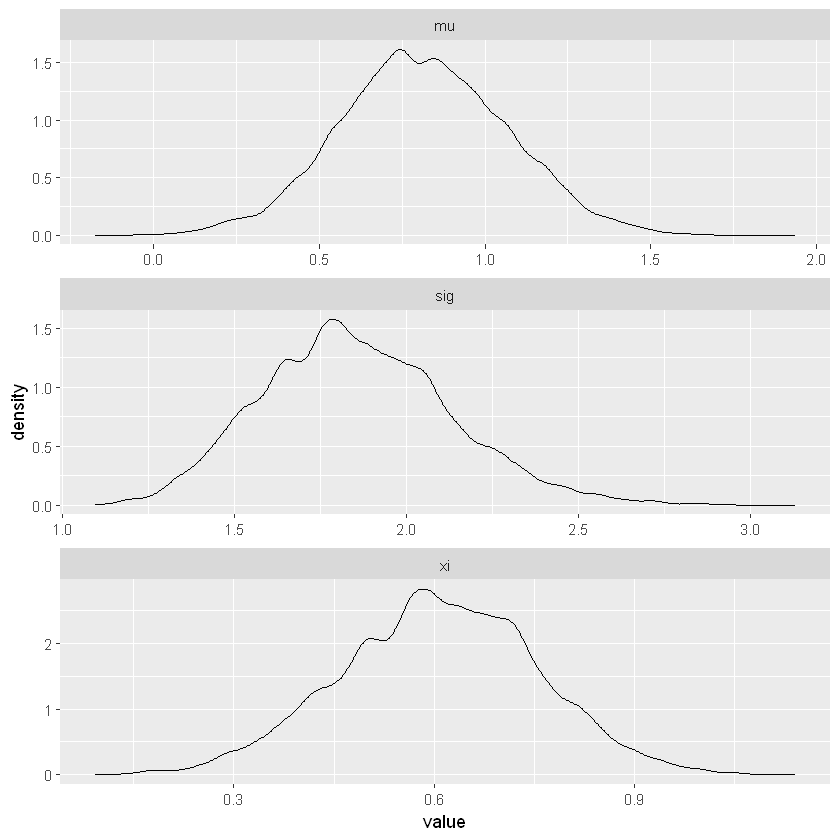

In [28]:
post.df %>% as.mcmc %>% ggs %>% ggs_density


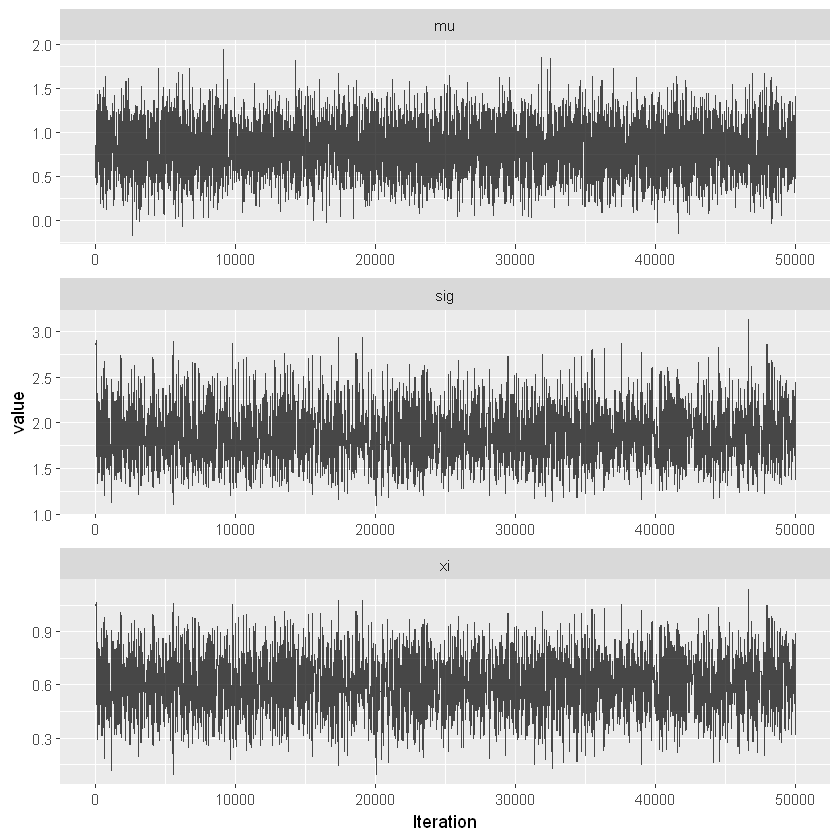

In [29]:
post.df %>% as.mcmc %>% ggs %>% ggs_traceplot


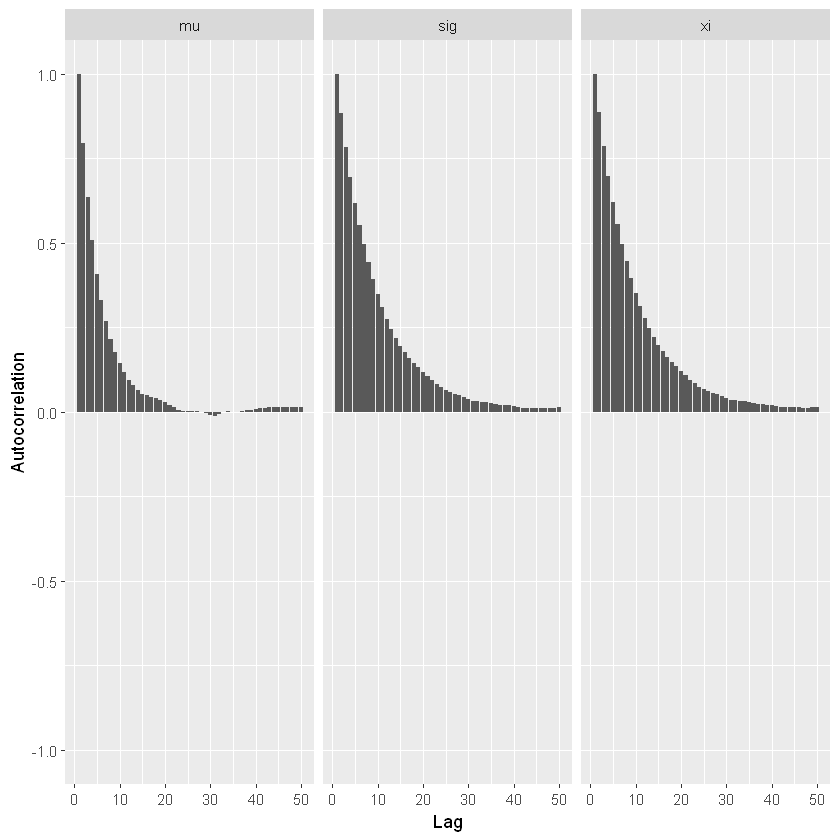

In [30]:
post.df %>% as.mcmc %>% ggs %>% ggs_autocorrelation

<img src="https://latex.codecogs.com/svg.image?">
<img src="https://latex.codecogs.com/svg.image?x^{(0)}">